<a href="https://colab.research.google.com/github/DanayaDiarra/MachineLearning/blob/main/DeepLearning(yolov8n)_for_french_fries_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project focuses on building a `custom object detection model` capable of identifying `french fries` in images using `YOLOv8`.

The workflow covers **dataset preparation**, **label verification**, **troubleshooting**  and **model training issues**

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import yaml

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
# Config file
data_config = {
    'path': '/content/drive/MyDrive/proper_dataset', # Dataset root directory
    'train': 'train/images', # Train images relative to 'path'
    'val': 'val/images',     # Val images relative to 'path'
    'names': {0: 'french_fries'} # Class name
}
# Write the YAML file
with open('french_fries.yaml', 'w') as file:
    yaml.dump(data_config, file, default_flow_style=False)

In [11]:
# Load a pretrained YOLO11n model
model = YOLO("yolov8n.pt")


train_results = model.train(
    data="french_fries.yaml",  # Path to dataset configuration file
    epochs=100,  # Number of training epochs
    imgsz=640,
    batch=15# Image size for training
    # device="cpu",  # Device to run on (e.g., 'cpu', 0, [0,1,2,3])
)

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=15, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=french_fries.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

##  #Training Statistics

In [50]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

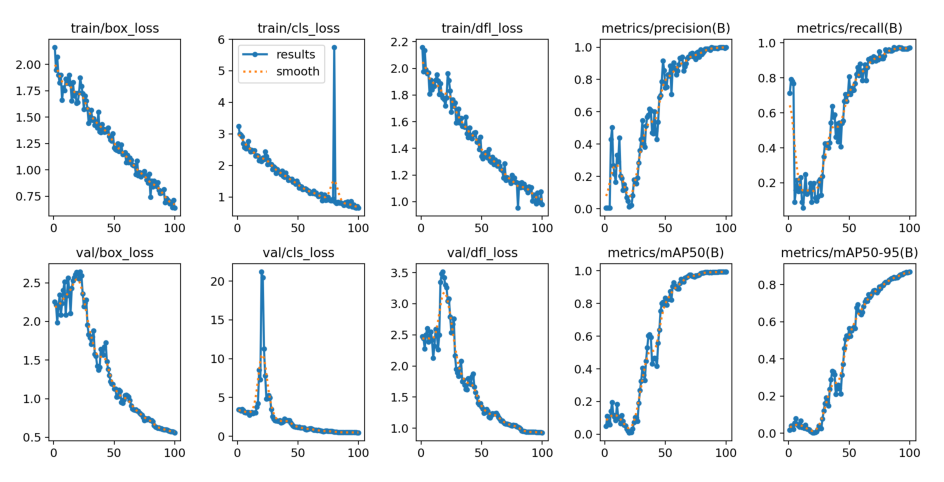

In [30]:
result_img = cv2.imread("/content/runs/detect/train8/results.png")
result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.imshow(result_img)
plt.axis("off")
plt.show()


##  #Model Prediction


0: 640x640 1 french_fries, 5.4ms
1: 640x640 2 french_friess, 5.4ms
2: 640x640 3 french_friess, 5.4ms
3: 640x640 1 french_fries, 5.4ms
Speed: 2.9ms preprocess, 5.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


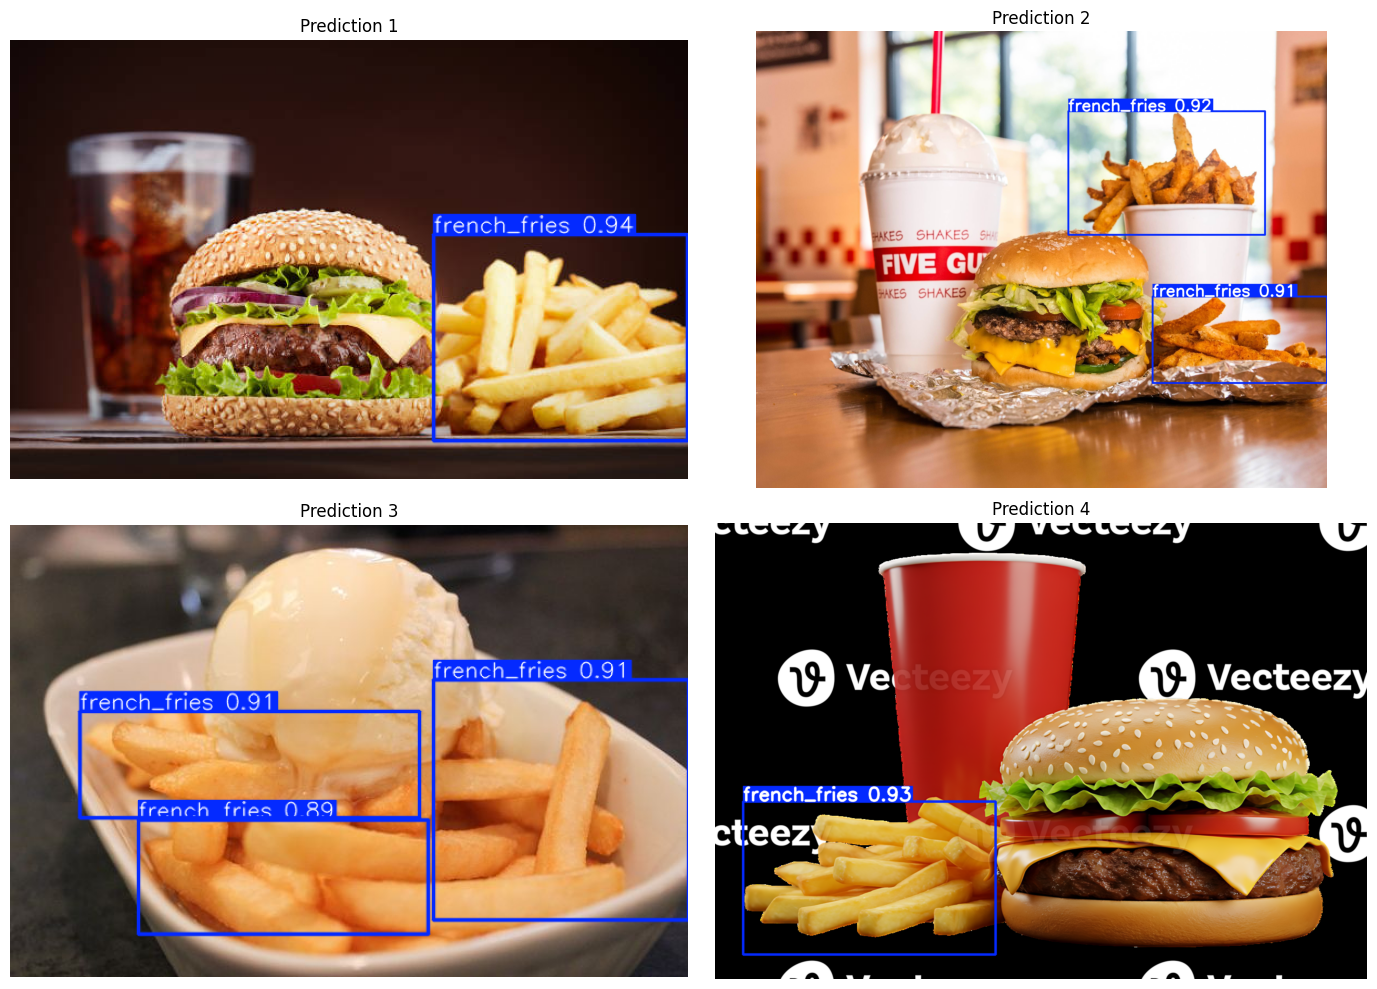

In [49]:
model = YOLO("/content/runs/detect/train8/weights/best.pt")

image_paths = [
    '/content/drive/MyDrive/proper_dataset/val/images/dc607cd4-11.jpg',
    '/content/drive/MyDrive/proper_dataset/val/images/f8205fba-47.jpeg',
    "/content/drive/MyDrive/proper_dataset/val/images/cafd1051-49.jpg",
    "/content/drive/MyDrive/proper_dataset/val/images/39f3ca2a-a-hamburger-and-fries-with-a-red-drink-png.png",
]
results = model.predict(source=image_paths)

plt.figure(figsize=(14, 10))

for i, r in enumerate(results):
    img = r.plot()
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 2, i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Prediction {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()